In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, datetime, timedelta
import pickle
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#import cufflinks as cf
import seaborn as sns

In [110]:
turbine_data = pickle.load(open("turbine_readings_5mins.pickle","rb")) 
weather_data = pd.read_csv("hourly_weather_data.csv")

In [111]:
turbine_data.shape

(2600, 87)

In [112]:
turbine_data.columns

Index(['kW_Turbine1', 'kW_Turbine2', 'kW_Turbine3', 'kW_Turbine4',
       'kW_Turbine5', 'kW_Turbine6', 'kW_Turbine7', 'kW_Turbine8',
       'kW_Turbine9', 'kW_Turbine10', 'kW_Turbine11', 'kW_Turbine12',
       'kW_Turbine13', 'kW_Turbine14', 'kW_Turbine15', 'kW_Turbine16',
       'kW_Turbine17', 'kW_Turbine18', 'kW_Turbine19', 'kW_Turbine20',
       'kW_Turbine21', 'kW_Turbine22', 'kW_Turbine23', 'kW_Turbine24',
       'kW_Turbine25', 'kW_Turbine26', 'kW_Turbine27', 'kW_Turbine28',
       'kW_Turbine29', 'kW_Turbine30', 'kW_Turbine31', 'kW_Turbine32',
       'kW_Turbine33', 'kW_Turbine34', 'kW_Turbine35', 'kW_Turbine36',
       'kW_Turbine37', 'kW_Turbine38', 'kW_Turbine39', 'kW_Turbine40',
       'kW_Turbine41', 'kW_Turbine42', 'kW_Turbine43', 'kW_Turbine44',
       'kW_Turbine45', 'kW_Turbine46', 'kW_Turbine47', 'kW_Turbine48',
       'kW_Turbine49', 'kW_Turbine50', 'kW_Turbine51', 'kW_Turbine52',
       'kW_Turbine53', 'kW_Turbine54', 'kW_Turbine55', 'kW_Turbine56',
       'kW_Turb

In [113]:
weather_data.shape

(9019, 45)

In [114]:
weather_data.columns

Index(['blunt_phrase', 'class', 'clds', 'day_ind', 'dewPt', 'expire_time_gmt',
       'feels_like', 'gust', 'heat_index', 'icon_extd', 'key', 'max_temp',
       'min_temp', 'obs_id', 'obs_name', 'precip_hrly', 'precip_total',
       'pressure', 'pressure_desc', 'pressure_tend', 'primary_swell_direction',
       'primary_swell_height', 'primary_swell_period', 'primary_wave_height',
       'primary_wave_period', 'qualifier', 'qualifier_svrty', 'rh',
       'secondary_swell_direction', 'secondary_swell_height',
       'secondary_swell_period', 'snow_hrly', 'temp', 'terse_phrase',
       'uv_desc', 'uv_index', 'valid_time_gmt', 'vis', 'water_temp', 'wc',
       'wdir', 'wdir_cardinal', 'wspd', 'wx_icon', 'wx_phrase'],
      dtype='object')

In [122]:
feature_dict = {"wspd" : "Average Windspeed (mph)",
                "wdir" : "Wind Direction",
                "temp" : "Temperature (Farenheit)",
                "feels_like" : "Feels Like Temperature (Farenheit)",
                "pressure" : "pressure"}

In [116]:
weather_data.head()

,blunt_phrase,class,clds,day_ind,dewPt,expire_time_gmt,feels_like,gust,heat_index,icon_extd,...,uv_index,valid_time_gmt,vis,water_temp,wc,wdir,wdir_cardinal,wspd,wx_icon,wx_phrase
0,NaN,observation,CLR,N,5.0,1451642400,20.0,NaN,28.0,3300.0,...,0,1451635200,10.0,NaN,20.0,10.0,N,8.0,33.0,Fair
1,NaN,observation,CLR,N,5.0,1451643600,21.0,NaN,28.0,3300.0,...,0,1451636400,10.0,NaN,21.0,20.0,NNE,7.0,33.0,Fair
2,NaN,observation,CLR,N,5.0,1451644800,22.0,NaN,28.0,3300.0,...,0,1451637600,10.0,NaN,22.0,20.0,NNE,6.0,33.0,Fair
3,NaN,observation,CLR,N,5.0,1451646000,30.0,NaN,30.0,3300.0,...,0,1451638800,10.0,NaN,30.0,NaN,CALM,0.0,33.0,Fair
4,NaN,observation,CLR,N,5.0,1451647200,28.0,NaN,28.0,3300.0,...,0,1451640000,10.0,NaN,28.0,NaN,CALM,0.0,33.0,Fair


In [117]:
weather_data = weather_data.dropna(axis=1, how="all")
weather_data["timestamp"] = pd.to_datetime(weather_data["valid_time_gmt"], unit="s") - pd.Timedelta("08:00:00")
weather_data["weather_date"] = weather_data["timestamp"].dt.date
weather_data["weather_time"] = weather_data["timestamp"].dt.time
weather_data["weather_month"] = weather_data["timestamp"].dt.month
weather_data["weather_day_of_month"] = weather_data["timestamp"].dt.day
weather_data["weather_day_of_week"] = weather_data["timestamp"].dt.dayofweek
weather_data["weather_hour_of_day"] = weather_data["timestamp"].dt.hour

In [118]:
turbine_data["turbine_date"] = turbine_data["timestamp"].dt.date
turbine_data["turbine_time"] = turbine_data["timestamp"].dt.time
turbine_data["turbine_month"] = turbine_data["timestamp"].dt.month
turbine_data["turbine_day_of_month"] = turbine_data["timestamp"].dt.day
turbine_data["turbine_day_of_week"] = turbine_data["timestamp"].dt.dayofweek
turbine_data["turbine_hour_of_day"] = turbine_data["timestamp"].dt.hour

turbine_names = list(turbine_data.columns.values)
#turbine_names.remove("timestamp")
turbine_names.remove("kW_Turbine86")
turbine_data["avg_kW_reading"] = turbine_data[turbine_names].sum(axis=1)/len(turbine_names)

In [168]:
hour_bins = [-1, 4, 11, 15, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

weather_data['weather_time_of_day_bin'] = pd.cut(weather_data['weather_hour_of_day'], 
                            bins=hour_bins, labels=bin_names)

turbine_data['turbine_time_of_day_bin'] = pd.cut(turbine_data['turbine_hour_of_day'], 
                            bins=hour_bins, labels=bin_names)

In [169]:
l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
l = pd.Series(l)
a = pd.cut(l,bins=hour_bins, labels=bin_names)

In [170]:
a

0     Late Night
1     Late Night
2     Late Night
3     Late Night
4     Late Night
5        Morning
6        Morning
7        Morning
8        Morning
9        Morning
10       Morning
11       Morning
12     Afternoon
13     Afternoon
14     Afternoon
15     Afternoon
16       Evening
17       Evening
18       Evening
19       Evening
20       Evening
21       Evening
22         Night
23         Night
dtype: category
Categories (5, object): [Late Night < Morning < Afternoon < Evening < Night]

In [171]:
weather_data.head()

,class,clds,day_ind,dewPt,expire_time_gmt,feels_like,gust,heat_index,icon_extd,key,...,wx_icon,wx_phrase,timestamp,weather_date,weather_time,weather_month,weather_day_of_month,weather_day_of_week,weather_hour_of_day,weather_time_of_day_bin
0,observation,CLR,N,5.0,1451642400,20.0,NaN,28.0,3300.0,KMHV,...,33.0,Fair,2016-01-01 00:00:00,2016-01-01,00:00:00,1,1,4,0,Late Night
1,observation,CLR,N,5.0,1451643600,21.0,NaN,28.0,3300.0,KMHV,...,33.0,Fair,2016-01-01 00:20:00,2016-01-01,00:20:00,1,1,4,0,Late Night
2,observation,CLR,N,5.0,1451644800,22.0,NaN,28.0,3300.0,KMHV,...,33.0,Fair,2016-01-01 00:40:00,2016-01-01,00:40:00,1,1,4,0,Late Night
3,observation,CLR,N,5.0,1451646000,30.0,NaN,30.0,3300.0,KMHV,...,33.0,Fair,2016-01-01 01:00:00,2016-01-01,01:00:00,1,1,4,1,Late Night
4,observation,CLR,N,5.0,1451647200,28.0,NaN,28.0,3300.0,KMHV,...,33.0,Fair,2016-01-01 01:20:00,2016-01-01,01:20:00,1,1,4,1,Late Night


In [172]:
turbine_data.head()

,kW_Turbine1,kW_Turbine2,kW_Turbine3,kW_Turbine4,kW_Turbine5,kW_Turbine6,kW_Turbine7,kW_Turbine8,kW_Turbine9,kW_Turbine10,...,kW_Turbine86,timestamp,turbine_date,turbine_time,turbine_month,turbine_day_of_month,turbine_day_of_week,turbine_hour_of_day,avg_kW_reading,turbine_time_of_day_bin
0,316.71,372.81,437.38,254.07,406.53,353.69,352.14,603.43,293.47,285.37,...,0.0,2016-01-01 00:00:00,2016-01-01,00:00:00,1,1,4,0,370.359457,Late Night
1,282.87,306.45,440.01,264.08,344.24,346.44,366.67,476.47,456.23,252.07,...,0.0,2016-01-01 00:05:00,2016-01-01,00:05:00,1,1,4,0,317.367500,Late Night
2,275.02,305.94,353.28,295.04,419.65,309.61,274.60,349.51,324.56,239.22,...,0.0,2016-01-01 00:10:00,2016-01-01,00:10:00,1,1,4,0,343.368261,Late Night
3,360.92,363.80,322.83,300.20,305.57,297.13,344.75,301.70,297.07,290.15,...,0.0,2016-01-01 00:15:00,2016-01-01,00:15:00,1,1,4,0,295.558043,Late Night
4,386.46,374.62,368.97,354.57,342.71,376.19,350.91,299.64,292.27,284.82,...,0.0,2016-01-01 00:20:00,2016-01-01,00:20:00,1,1,4,0,313.955109,Late Night


## Weather Plots

In [173]:
cols = list(feature_dict.keys())

In [174]:
cols

['wspd', 'wdir', 'temp', 'feels_like', 'pressure']

In [175]:
# hour_of_the_day

weather_grouped_hour = weather_data.groupby(['weather_hour_of_day'],as_index=False)[cols].mean()
weather_grouped_hour

,weather_hour_of_day,wspd,wdir,temp,feels_like,pressure
0,0,13.820163,274.158730,56.108992,54.190736,27.118338
1,1,12.994609,272.215190,55.381720,53.510753,27.115349
2,2,11.794595,272.950820,54.570270,52.743243,27.113514
3,3,11.131507,275.283688,54.184783,52.418033,27.111087
4,4,10.191375,262.922535,53.272237,51.404313,27.115418
5,5,9.027174,261.150794,52.926630,51.334239,27.123668
6,6,8.592896,248.849558,53.819672,52.554645,27.136858
7,7,8.904891,235.787234,57.032609,55.671196,27.147520
8,8,9.336022,201.742739,61.309140,59.967742,27.152715
9,9,10.276139,191.875000,64.018717,62.577540,27.156604


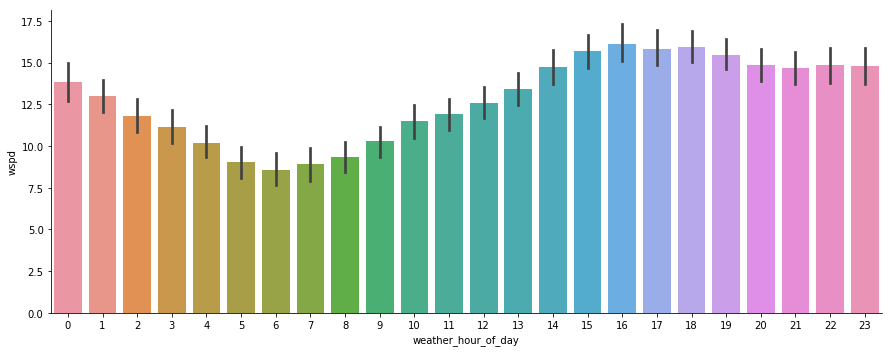

In [176]:
fig = sns.catplot(x="weather_hour_of_day" ,y="wspd", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("wspd_hour.png")

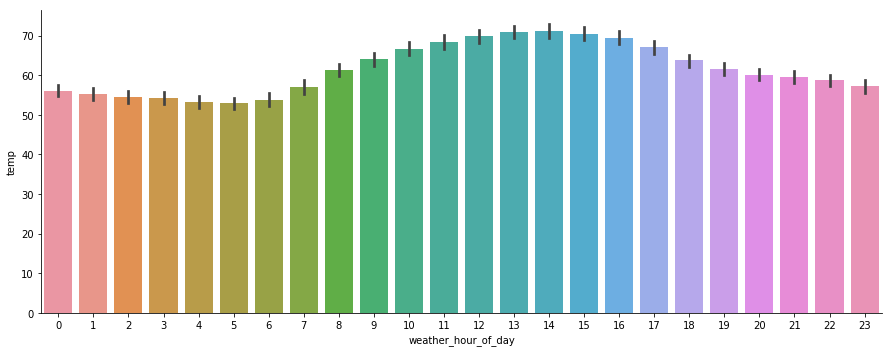

In [177]:
fig = sns.catplot(x="weather_hour_of_day" ,y="temp", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("temp_hour.png")

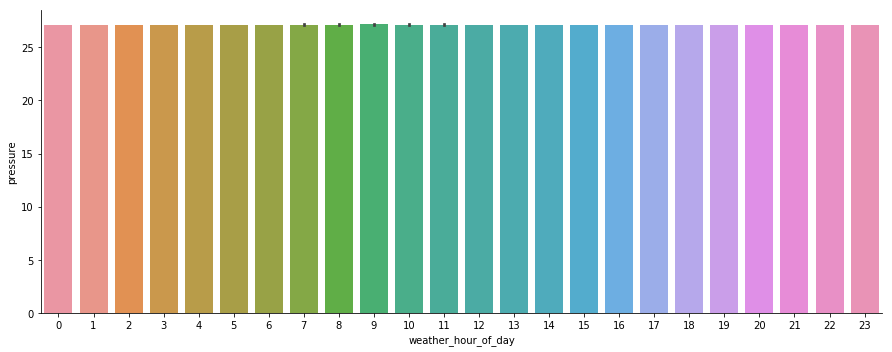

In [178]:
fig = sns.catplot(x="weather_hour_of_day" ,y="pressure", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)

In [179]:
# time_of_day

weather_grouped_bins = weather_data.groupby(['weather_time_of_day_bin'],as_index=False)[cols].mean()
weather_grouped_bins

,weather_time_of_day_bin,wspd,wdir,temp,feels_like,pressure
0,Late Night,11.985358,271.591212,54.701840,52.852113,27.114740
1,Morning,9.956639,215.805180,60.695669,59.302415,27.145452
2,Afternoon,14.110526,213.772358,70.573307,69.099934,27.106432
3,Evening,15.472465,251.554581,63.564382,61.951528,27.101619
4,Night,14.815508,269.259259,57.989319,56.213904,27.121348


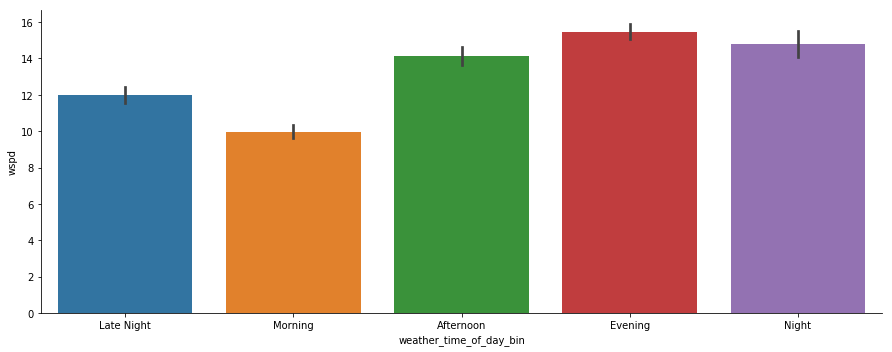

In [180]:
fig = sns.catplot(x="weather_time_of_day_bin" ,y="wspd", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("wspd_bin.png")

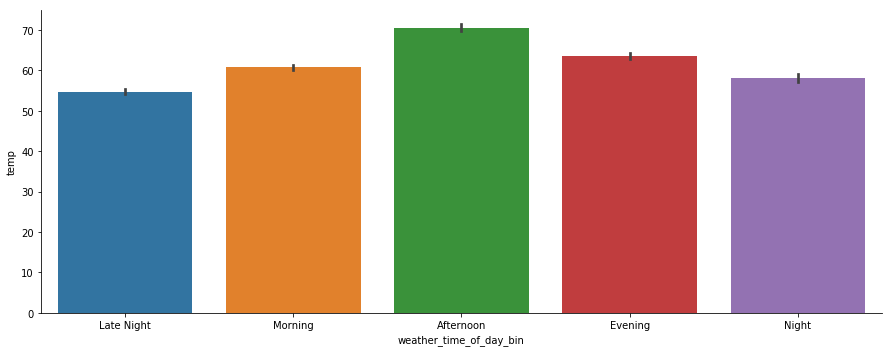

In [181]:
fig = sns.catplot(x="weather_time_of_day_bin" ,y="temp", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("temp_bin.png")

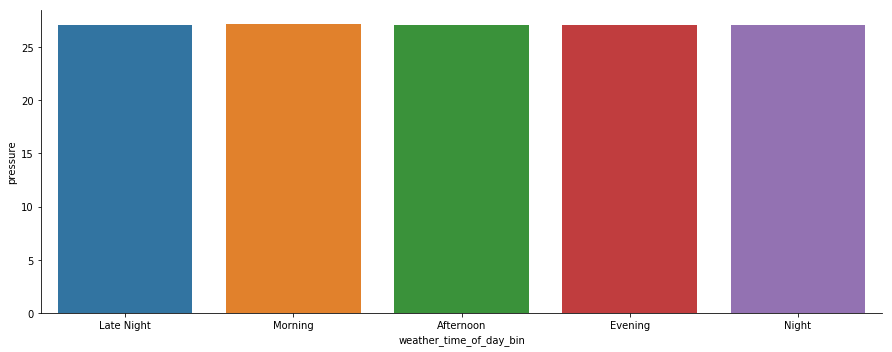

In [182]:
fig = sns.catplot(x="weather_time_of_day_bin" ,y="pressure", data=weather_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)

## Turbine Plots

In [183]:
# hour_of_the_day

turbine_grouped_hour = turbine_data.groupby(['turbine_hour_of_day'],as_index=False)['avg_kW_reading'].mean()
turbine_grouped_hour

,turbine_hour_of_day,avg_kW_reading
0,0,494.260265
1,1,633.291701
2,2,673.942113
3,3,689.840956
4,4,791.082675
5,5,745.070694
6,6,704.429051
7,7,659.715947
8,8,646.585155
9,9,583.237429


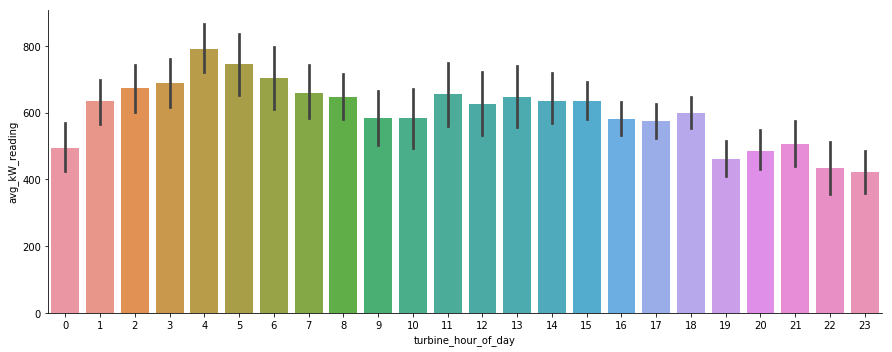

In [184]:
fig = sns.catplot(x="turbine_hour_of_day" ,y="avg_kW_reading", data=turbine_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("output_hour.png")

In [185]:
# time_of_the_day

turbine_grouped_bins = turbine_data.groupby(['turbine_time_of_day_bin'],as_index=False)['avg_kW_reading'].mean()
turbine_grouped_bins

,turbine_time_of_day_bin,avg_kW_reading
0,Late Night,654.115319
1,Morning,654.015324
2,Afternoon,635.887659
3,Evening,534.244509
4,Night,427.786679


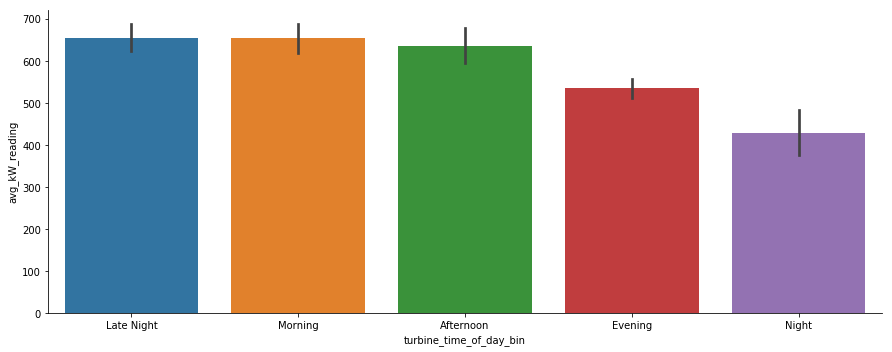

In [186]:
fig = sns.catplot(x="turbine_time_of_day_bin" ,y="avg_kW_reading", data=turbine_data, kind='bar', aspect=2.5, ci=95, n_boot=1000)
fig.savefig("output_bin.png")

## Combined Plots

In [187]:
# hour_of_the_day

for feature in feature_dict:
    trace1 = go.Scatter(
        x=turbine_grouped_hour["turbine_hour_of_day"],
        y=turbine_grouped_hour["avg_kW_reading"],
        mode="lines",
        name="Average Turbine Reading"
    )

    trace2 = go.Scatter(
        x=weather_grouped_hour["weather_hour_of_day"],
        y=weather_grouped_hour[feature],
        mode="lines",
        name=feature_dict[feature],
        yaxis="y2"
    )

    data = [trace1, trace2]
    layout = go.Layout(
        title='Turbine Output vs. ' + feature_dict[feature],
        yaxis=dict(
            title='Turbine Output (kWh)',
            titlefont=dict(
                color='#1f77b4'
            ),
            tickfont=dict(
                color='#1f77b4'
            )
        ),
        yaxis2=dict(
            title=feature_dict[feature],
            titlefont=dict(
                color='#ff7f0e'
            ),
            tickfont=dict(
                color='#ff7f0e'
            ),
            overlaying='y',
            side='right'
        )
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


In [188]:
## time_of_the_day

for feature in feature_dict:
    trace1 = go.Scatter(
        x=turbine_grouped_bins["turbine_time_of_day_bin"],
        y=turbine_grouped_bins["avg_kW_reading"],
        mode="lines",
        name="Average Turbine Reading"
    )

    trace2 = go.Scatter(
        x=weather_grouped_bins["weather_time_of_day_bin"],
        y=weather_grouped_bins[feature],
        mode="lines",
        name=feature_dict[feature],
        yaxis="y2"
    )

    data = [trace1, trace2]
    layout = go.Layout(
        title='Turbine Output vs. ' + feature_dict[feature],
        yaxis=dict(
            title='Turbine Output (kWh)',
            titlefont=dict(
                color='#1f77b4'
            ),
            tickfont=dict(
                color='#1f77b4'
            )
        ),
        yaxis2=dict(
            title=feature_dict[feature],
            titlefont=dict(
                color='#ff7f0e'
            ),
            tickfont=dict(
                color='#ff7f0e'
            ),
            overlaying='y',
            side='right'
        )
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)